In [7]:
import pandas as pd;
import ast;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

## Data Cleaning

In [8]:
weapons = pd.read_csv('data/weapons.csv')
armors = pd.read_csv('data/armors.csv')

In [9]:
# Function to parse attack/defence data and extract relevant values
def extract_values(data, prefix):
    """
    Converts a list of dictionaries into separate columns with prefix.
    """
    if isinstance(data, str):
        data = ast.literal_eval(data)  # Convert string representation to list
    
    values = {f"{prefix}_{entry['name']}": entry['amount'] for entry in data}
    return values

# Apply the function to attack and defence columns
attack_values = weapons["attack"].apply(lambda x: extract_values(x, "attack"))
defence_values = weapons["defence"].apply(lambda x: extract_values(x, "defence"))

# Convert lists of dictionaries into DataFrame and merge
attack_weapons = pd.DataFrame(attack_values.tolist())
defence_weapons = pd.DataFrame(defence_values.tolist())

# Merge the new attack and defence columns with the original DataFrame
weapons = weapons.drop(columns=["attack", "defence"]).join(attack_weapons).join(defence_weapons)


In [10]:
# delete the NA columns
weapons = weapons.drop(columns=['attack_e">Mag', 'attack_e-color="">Mag', 'attack_Phy120'])

# combine the attack_Sor and attack_Sorc into a single column
weapons["attack_Sorc"] = weapons["attack_Sor"] + weapons["attack_Sorc"]
weapons = weapons.drop(columns=["attack_Sor"])
weapons.columns


weapons = weapons.drop(columns=["attack_Light"])
weapons.columns

Index(['id', 'name', 'image', 'description', 'scalesWith',
       'requiredAttributes', 'category', 'weight', 'attack_Phy', 'attack_Mag',
       'attack_Fire', 'attack_Ligt', 'attack_Holy', 'attack_Crit',
       'attack_Rng', 'attack_Inc', 'attack_Sorc', 'defence_Phy', 'defence_Mag',
       'defence_Fire', 'defence_Ligt', 'defence_Holy', 'defence_Boost'],
      dtype='object')

In [11]:
# Function to parse scalesWith and requiredAttributes data and extract relevant values
def extract_scaling(data, prefix):
    """
    Converts a list of dictionaries into separate columns with prefix.
    """
    if isinstance(data, str):
        try:
            data = ast.literal_eval(data)  # Convert string representation to list
        except (ValueError, SyntaxError):
            return {}
    
    values = {f"{prefix}_{entry.get('name', 'Unknown')}": entry.get('scaling', None) for entry in data}
    return values

def extract_requirements(data, prefix):
    """
    Converts a list of dictionaries into separate columns with prefix.
    """
    if isinstance(data, str):
        data = ast.literal_eval(data)  # Convert string representation to list

    values = {f"{prefix}_{entry['name']}": entry['amount'] for entry in data}
    return values

# Apply the functions to scalesWith and requiredAttributes columns
scaling_values = weapons["scalesWith"].apply(lambda x: extract_scaling(x, "scaling"))
requirements_values = weapons["requiredAttributes"].apply(lambda x: extract_requirements(x, "requirement"))

# Convert lists of dictionaries into DataFrame and merge
scaling_df = pd.DataFrame(scaling_values.tolist())
requirements_df = pd.DataFrame(requirements_values.tolist())

# Merge the new columns with the original DataFrame
weapons = weapons.drop(columns=["scalesWith", "requiredAttributes"]).join(scaling_df).join(requirements_df)

weapons.columns

Index(['id', 'name', 'image', 'description', 'category', 'weight',
       'attack_Phy', 'attack_Mag', 'attack_Fire', 'attack_Ligt', 'attack_Holy',
       'attack_Crit', 'attack_Rng', 'attack_Inc', 'attack_Sorc', 'defence_Phy',
       'defence_Mag', 'defence_Fire', 'defence_Ligt', 'defence_Holy',
       'defence_Boost', 'scaling_Str', 'scaling_Dex', 'scaling_Arc',
       'scaling_Int', 'scaling_Fai', 'scaling_-', 'scaling_', 'scaling_STR',
       'scaling_DEX', 'scaling_INT', 'requirement_Str', 'requirement_Dex',
       'requirement_Arc', 'requirement_Int', 'requirement_Fai',
       'requirement_STR', 'requirement_DEX', 'requirement_INT', 'requirement_',
       'requirement_-'],
      dtype='object')

In [12]:
# delete the NA scaling_- and scaling_ columns
weapons = weapons.drop(columns=['scaling_-', 'scaling_'])

# combine the scaling_Str and scaling_STR into a single column
weapons["scaling_Str"] = weapons["scaling_Str"] + weapons["scaling_STR"]
weapons = weapons.drop(columns=["scaling_STR"])

# combine the scaling_Dex and scaling_DEX into a single column
weapons["scaling_Dex"] = weapons["scaling_Dex"] + weapons["scaling_DEX"]
weapons = weapons.drop(columns=["scaling_DEX"])

# combine the scaling_Int and scaling_INT into a single column
weapons["scaling_Int"] = weapons["scaling_Int"] + weapons["scaling_INT"]
weapons = weapons.drop(columns=["scaling_INT"])

# combine the requirement_Str and requirement_STR into a single column
weapons["requirement_Str"] = weapons["requirement_Str"] + weapons["requirement_STR"]
weapons = weapons.drop(columns=["requirement_STR"])

# combine the requirement_Dex and requirement_DEX into a single column
weapons["requirement_Dex"] = weapons["requirement_Dex"] + weapons["requirement_DEX"]
weapons = weapons.drop(columns=["requirement_DEX"])

# combine the requirement_Int and requirement_INT into a single column
weapons["requirement_Int"] = weapons["requirement_Int"] + weapons["requirement_INT"]
weapons = weapons.drop(columns=["requirement_INT"])

# delete the NA requirement_- and requirement_ columns
weapons = weapons.drop(columns=['requirement_-', 'requirement_'])

weapons.columns


Index(['id', 'name', 'image', 'description', 'category', 'weight',
       'attack_Phy', 'attack_Mag', 'attack_Fire', 'attack_Ligt', 'attack_Holy',
       'attack_Crit', 'attack_Rng', 'attack_Inc', 'attack_Sorc', 'defence_Phy',
       'defence_Mag', 'defence_Fire', 'defence_Ligt', 'defence_Holy',
       'defence_Boost', 'scaling_Str', 'scaling_Dex', 'scaling_Arc',
       'scaling_Int', 'scaling_Fai', 'requirement_Str', 'requirement_Dex',
       'requirement_Arc', 'requirement_Int', 'requirement_Fai'],
      dtype='object')

In [13]:
# Export the cleaned data to a new CSV file
weapons.to_csv('data/weapons_cleaned.csv', index=False)

## Explore the relationship between weapons' attributes

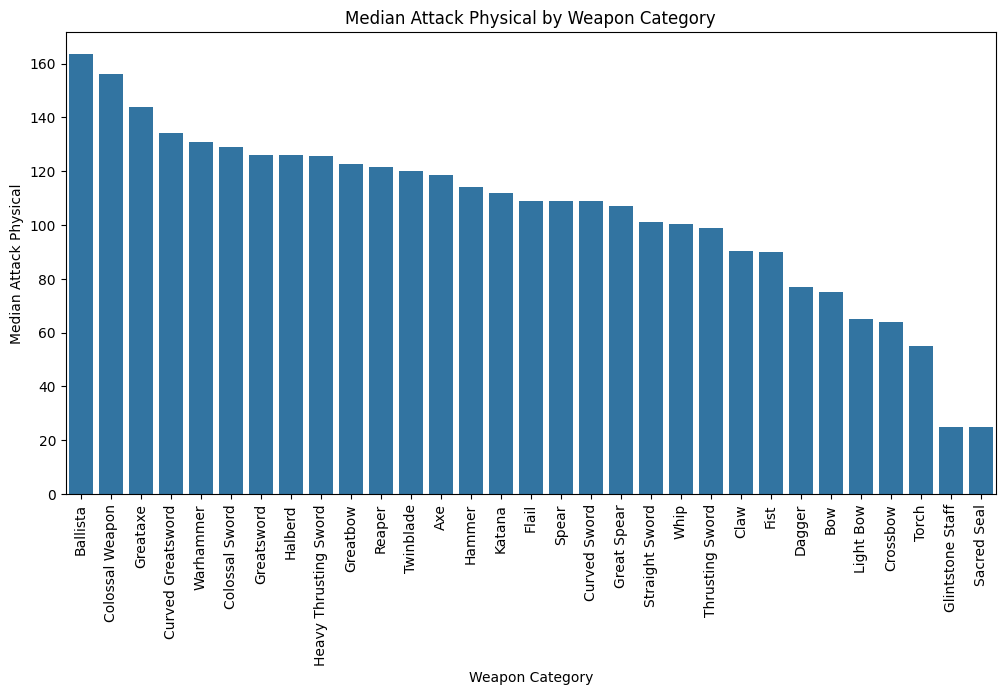

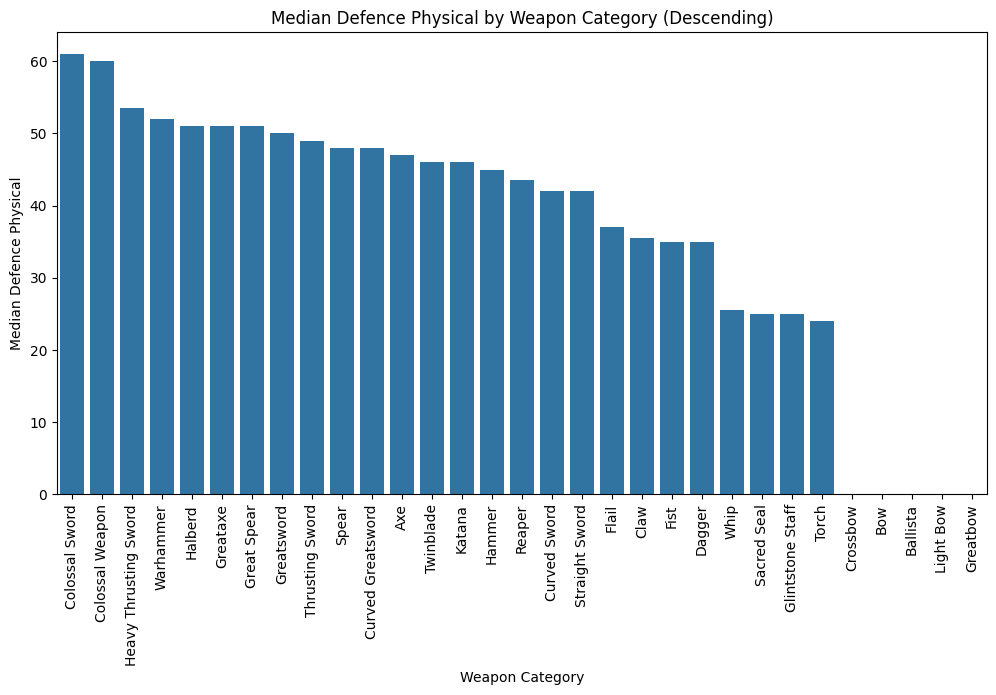

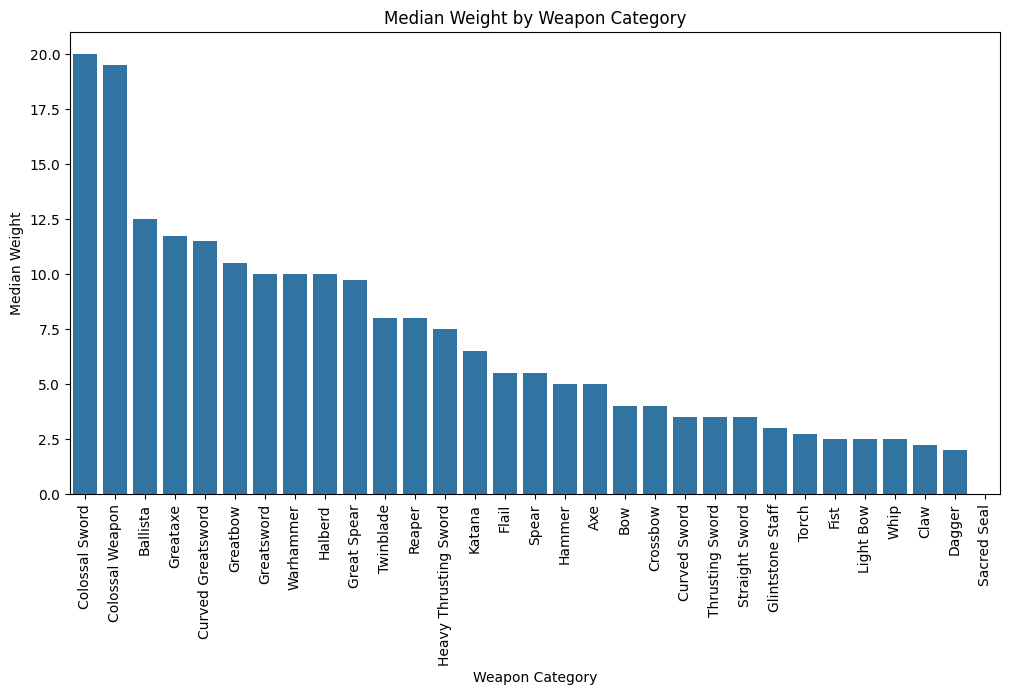

In [15]:
# Compute median attack_Phy for each category and sort in descending order
attack_phy_median = weapons.groupby("category")["attack_Phy"].median().sort_values(ascending=False)

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=attack_phy_median.index, y=attack_phy_median.values)
plt.xticks(rotation=90)
plt.xlabel("Weapon Category")
plt.ylabel("Median Attack Physical")
plt.title("Median Attack Physical by Weapon Category")
plt.show()

# Compute median defence_Phy for each category and sort in descending order
defence_phy_median = weapons.groupby("category")["defence_Phy"].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=defence_phy_median.index, y=defence_phy_median.values)
plt.xticks(rotation=90)
plt.xlabel("Weapon Category")
plt.ylabel("Median Defence Physical")
plt.title("Median Defence Physical by Weapon Category (Descending)")
plt.show()

# Compute median weight for each category and sort in descending order
weight_median = weapons.groupby("category")["weight"].median().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=weight_median.index, y=weight_median.values)
plt.xticks(rotation=90)
plt.xlabel("Weapon Category")
plt.ylabel("Median Weight")
plt.title("Median Weight by Weapon Category")
plt.show()


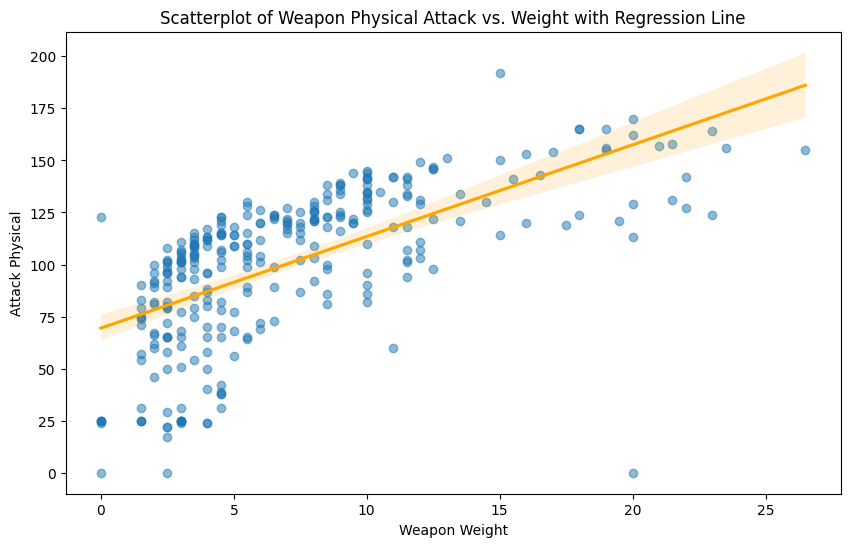

In [31]:
# Scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=weapons["weight"], y=weapons["attack_Phy"], scatter_kws={"alpha": 0.5}, line_kws={"color": "orange"})
plt.xlabel("Weapon Weight")
plt.ylabel("Attack Physical")
plt.title("Scatterplot of Weapon Physical Attack vs. Weight with Regression Line")
plt.savefig("visualizations/scatterplot_weight_attack.png")
plt.show()

In [17]:
attack_and_weight = df_clean = weapons.dropna(subset=["weight", "attack_Phy"])

In [ ]:
import statsmodels.api as sm

# simple linear regression between attack_Phy and weight

# Define independent (X) and dependent (y) variables
X = attack_and_weight["weight"]  # Predictor
y = attack_and_weight["attack_Phy"]  # Response

# Add a constant for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attack_Phy   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     208.0
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           2.79e-36
Time:                        10:59:26   Log-Likelihood:                -1451.3
No. Observations:                 306   AIC:                             2907.
Df Residuals:                     304   BIC:                             2914.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4476      2.683     25.883      0.000      64.168      74.727
weight         4.4024      0.305     14.421      0.000       3.802       5.003
==============================================================================
Omnibus:                       78.152   Durbin-Watson:                   1.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.322
Skew:                          -1.268   Prob(JB):                     6.28e-38
Kurtosis:                       5.646   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Since the p-value is extremely small, the weight variable significantly impacts physical attack power.
- For every 1-unit increase in weight, physical attack power increases by about 4.40 units.
- However, since R-squared is only 40.6%, other weapon properties likely impact physical attack power.

In [ ]:
# Multiple Regression: Attack_Phy ~ Defence_Phy + Weight

# Define independent (X) and dependent (y) variables
X_multi = df_clean[["defence_Phy", "weight"]]  # Predictors
y_multi = df_clean["attack_Phy"]  # Response

# Add a constant for the intercept term
X_multi = sm.add_constant(X_multi)

# Fit the multiple regression model
multi_model = sm.OLS(y_multi, X_multi).fit()

multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             attack_Phy   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     173.6
Date:                Fri, 18 Apr 2025   Prob (F-statistic):           5.69e-51
Time:                        10:59:34   Log-Likelihood:                -1414.2
No. Observations:                 306   AIC:                             2834.
Df Residuals:                     303   BIC:                             2846.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          42.5802      3.789     11.239      0.000      35.125      50.035
defence_Phy     0.9697      0.106      9.117      0.000       0.760       1.179
weight          2.7474      0.326      8.426      0.000       2.106       3.389
==============================================================================
Omnibus:                       93.434   Durbin-Watson:                   1.159
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              521.021
Skew:                          -1.127   Prob(JB):                    7.27e-114
Kurtosis:                       8.982   Cond. No.                         117.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Both defence_Phy and weight significantly influence attack_Phy.
- Weight has a larger impact on physical attack power (2.75 per unit) than defence_Phy (0.97 per unit).
- 53.4% of the variation in physical attack power is explained by these two factors.

In [20]:
# extract the weapons category
weapons_category = weapons["category"].unique()
weapons_category

array(['Axe', 'Ballista', 'Bow', 'Claw', 'Colossal Sword',
       'Colossal Weapon', 'Crossbow', 'Curved Greatsword', 'Curved Sword',
       'Dagger', 'Fist', 'Flail', 'Glintstone Staff', 'Greataxe',
       'Greatbow', 'Great Spear', 'Greatsword', 'Halberd', 'Hammer',
       'Heavy Thrusting Sword', 'Katana', 'Light Bow', 'Reaper',
       'Sacred Seal', 'Spear', 'Straight Sword', 'Thrusting Sword',
       'Torch', 'Twinblade', 'Warhammer', 'Whip'], dtype=object)

In [21]:
weapons_speed = pd.read_csv('data/weapon_hits_per_minute.csv')
# convert each word's first letter to upper case
weapons_speed["Weapon Type"] = weapons_speed["Weapon Type"].str.title()

# Join the two DataFrames on the "Weapon Type" column
weapons_speed = weapons_speed.rename(columns={"Weapon Type": "category"})

weapons = weapons.join(weapons_speed.set_index("category"), on="category")

# extract the needed columns
weapons_clean = weapons[["name", "category", "weight", "attack_Phy", "attack_Mag", "attack_Fire", "attack_Ligt", "attack_Holy", "defence_Phy", "Hits Per Minute"]]

In [22]:
# drop the NA values
weapons_clean = weapons_clean.dropna()

weapons_clean

,name,category,weight,attack_Phy,attack_Mag,attack_Fire,attack_Ligt,attack_Holy,defence_Phy,Hits Per Minute
0,Hand Axe,Axe,3.5,113.0,0.0,0,0.0,0,42,85.0
1,Jawbone Axe,Axe,5.5,124.0,0.0,0,0.0,0,49,85.0
2,Forked Hatchet,Axe,2.5,101.0,0.0,0,0.0,0,40,85.0
3,Iron Cleaver,Axe,6.0,120.0,0.0,0,0.0,0,51,85.0
4,Battle Axe,Axe,4.5,123.0,0.0,0,0.0,0,47,85.0
...,...,...,...,...,...,...,...,...,...,...
302,Thorned Whip,Whip,2.5,102.0,0.0,0,0.0,0,26,54.0
303,Magma Whip Candlestick,Whip,2.5,72.0,0.0,72,0.0,0,21,54.0
304,Hoslow's Petal Whip,Whip,3.5,110.0,0.0,0,0.0,0,28,54.0
305,Giant's Red Braid,Whip,2.5,82.0,0.0,53,0.0,0,24,54.0


In [23]:
# Extract the physical weapons

physical_weapons = weapons_clean[
    (weapons_clean["attack_Phy"] > 0) &
    (weapons_clean["attack_Mag"] == 0) &
    (weapons_clean["attack_Fire"] == 0) &
    (weapons_clean["attack_Ligt"] == 0) &
    (weapons_clean["attack_Holy"] == 0)
].copy()


In [24]:
physical_weapons

,name,category,weight,attack_Phy,attack_Mag,attack_Fire,attack_Ligt,attack_Holy,defence_Phy,Hits Per Minute
0,Hand Axe,Axe,3.5,113.0,0.0,0,0.0,0,42,85.0
1,Jawbone Axe,Axe,5.5,124.0,0.0,0,0.0,0,49,85.0
2,Forked Hatchet,Axe,2.5,101.0,0.0,0,0.0,0,40,85.0
3,Iron Cleaver,Axe,6.0,120.0,0.0,0,0.0,0,51,85.0
4,Battle Axe,Axe,4.5,123.0,0.0,0,0.0,0,47,85.0
...,...,...,...,...,...,...,...,...,...,...
300,Whip,Whip,2.0,100.0,0.0,0,0.0,0,25,54.0
301,Rotten Battle Hammer,Warhammer,10.0,126.0,0.0,0,0.0,0,52,46.0
302,Thorned Whip,Whip,2.5,102.0,0.0,0,0.0,0,26,54.0
304,Hoslow's Petal Whip,Whip,3.5,110.0,0.0,0,0.0,0,28,54.0


In [25]:
weapons_final = physical_weapons.groupby("category")[["attack_Phy", "Hits Per Minute","defence_Phy"]].median().reset_index()
weapons_final.rename(columns={"Hits Per Minute": "hits_per_minute"}, inplace=True)
weapons_final.rename(columns={"category": "weapon"}, inplace=True)
weapons_final

# Save the final DataFrame to a CSV file
weapons_final.to_csv('data/physical_weapons.csv', index=False)

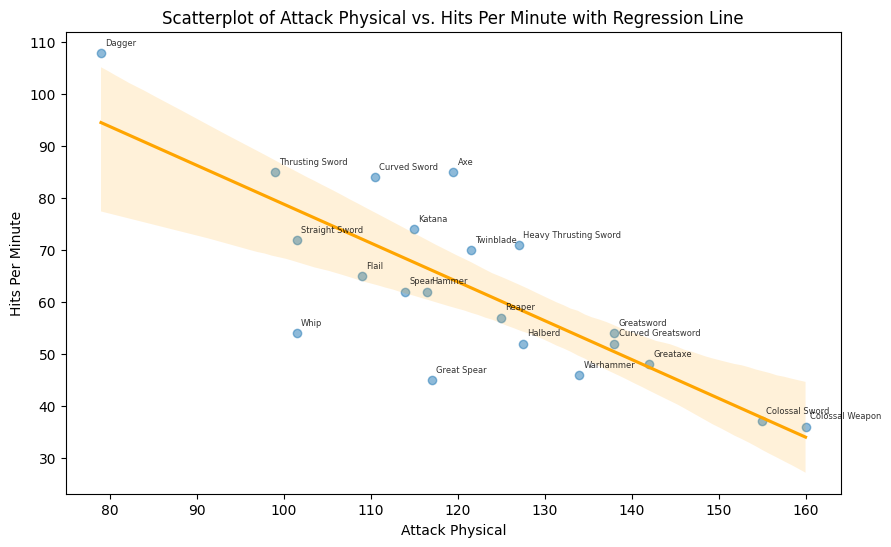

In [26]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x=weapons_final["attack_Phy"],
    y=weapons_final["hits_per_minute"],
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "orange"}
)
plt.xlabel("Attack Physical")
plt.ylabel("Hits Per Minute")
plt.title("Scatterplot of Attack Physical vs. Hits Per Minute with Regression Line")

# Offset for annotations
y_offset = 1.5
x_offset = 0.5

# Add weapon names slightly above each point
for i in range(len(weapons_final)):
    x = weapons_final["attack_Phy"].iloc[i]
    y = weapons_final["hits_per_minute"].iloc[i]
    plt.annotate(
        weapons_final["weapon"].iloc[i],
        (x+x_offset, y + y_offset),
        fontsize=6,
        alpha=0.8
    )

plt.savefig("visualizations/scatterplot_attack_hits.png")
plt.show()

## Player Progression Curve: HP and Vigor Level

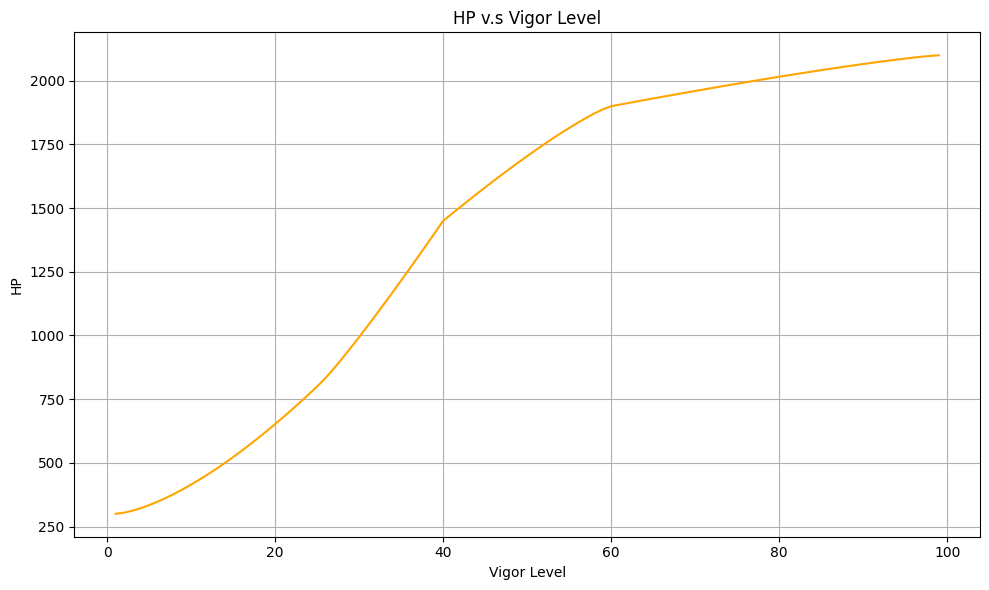

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the piecewise function H(L)
def H(L):
    H_values = []
    for l in L:
        if 1 <= l <= 25:
            h = 300 + 500 * ((l - 1) / 24) ** 1.5
        elif 26 <= l <= 40:
            h = 800 + 650 * ((l - 25) / 15) ** 1.1
        elif 41 <= l <= 60:
            h = 1450 + 450 * (1 - (1 - (l - 40) / 20) ** 1.2)
        elif 61 <= l <= 99:
            h = 1900 + 200 * (1 - (1 - (l - 60) / 39) ** 1.2)
        else:
            h = np.nan
        H_values.append(h)
    return np.array(H_values)

# Generate L values and compute H(L)
L = np.arange(1, 100)
H_values = H(L)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(L, H_values, color='orange')
plt.xlabel('Vigor Level')
plt.ylabel('HP')
plt.title('HP v.s Vigor Level')
plt.grid(True)
plt.tight_layout()
plt.savefig('visualizations/HP_vs_Vigor_Level.png', dpi=300)
plt.show()


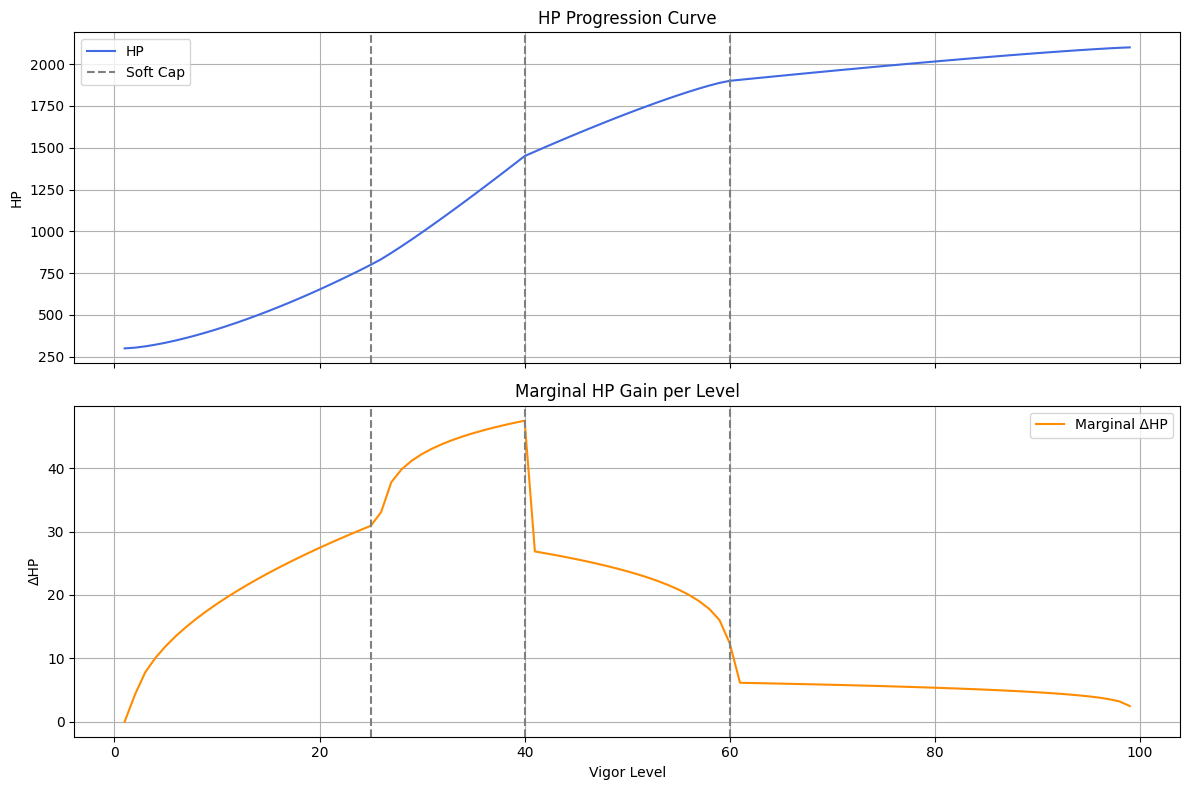

In [29]:
# HP progression formula based on Vigor level
def hp_from_vigor(L):
    if 1 <= L <= 25:
        return 300 + 500 * ((L - 1) / 24) ** 1.5
    elif 26 <= L <= 40:
        return 800 + 650 * ((L - 25) / 15) ** 1.1
    elif 41 <= L <= 60:
        return 1450 + 450 * (1 - (1 - (L - 40) / 20) ** 1.2)
    elif 61 <= L <= 99:
        return 1900 + 200 * (1 - (1 - (L - 60) / 39) ** 1.2)
    else:
        return np.nan

# Create level range and compute HP values
vigor_levels = np.arange(1, 100)
hp_values = np.array([hp_from_vigor(L) for L in vigor_levels])

# Compute marginal returns: ΔHP/ΔLevel
marginal_hp = np.diff(hp_values, prepend=hp_values[0])

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plot HP vs Vigor
ax[0].plot(vigor_levels, hp_values, label='HP', color='royalblue')
ax[0].set_ylabel("HP")
ax[0].set_title("HP Progression Curve")
ax[0].axvline(25, color='gray', linestyle='--', label='Soft Cap')
ax[0].axvline(40, color='gray', linestyle='--')
ax[0].axvline(60, color='gray', linestyle='--')
ax[0].legend()
ax[0].grid(True)

# Plot Marginal Return: ΔHP per level
ax[1].plot(vigor_levels, marginal_hp, label='Marginal ΔHP', color='darkorange')
ax[1].set_xlabel("Vigor Level")
ax[1].set_ylabel("ΔHP")
ax[1].set_title("Marginal HP Gain per Level")
ax[1].axvline(25, color='gray', linestyle='--')
ax[1].axvline(40, color='gray', linestyle='--')
ax[1].axvline(60, color='gray', linestyle='--')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()

plt.savefig('visualizations/HP_vs_Vigor_Level_marginal.png', dpi=300)
plt.show()


## Defense Multiplier

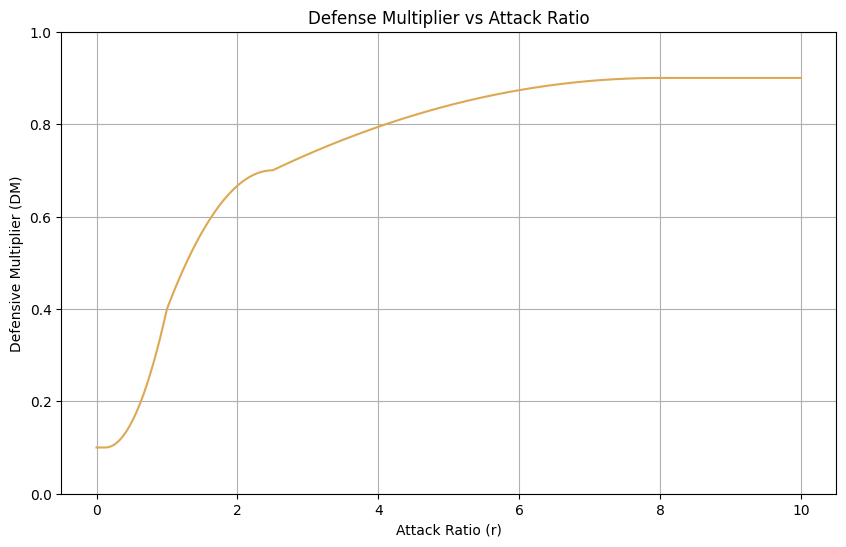

In [30]:
# Defensive Multiplier (DM) function
def DM(r):
    if r < 0.125:
        return 0.10
    elif 0.125 <= r <= 1:
        return 0.10 + ((r - 0.125)**2) / 2.552
    elif 1 < r <= 2.5:
        return 0.70 - ((2.5 - r)**2) / 7.5
    elif 2.5 < r <= 8:
        return 0.90 - ((8 - r)**2) / 151.25
    else:
        return 0.90


# Generate r values and compute DM for each
r_values = np.linspace(0, 10, 1000)
dm_values = [DM(r) for r in r_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(r_values, dm_values, color='#DDA853')
plt.title('Defense Multiplier vs Attack Ratio')
plt.xlabel('Attack Ratio (r)')
plt.ylabel('Defensive Multiplier (DM)')
plt.grid(True)
plt.ylim(0, 1)
plt.savefig('visualizations/DM_vs_r.png', dpi=300)
plt.show()